<a href="https://colab.research.google.com/github/BrianKipngeno/DS_CORE-WEEK-2-IP/blob/main/Brian_Kipngeno_wk2_core_ip_python_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finscope surveys(Exploratory Data Analysis)


## 1. Defining the Question

### a) Specifying the Data Analytic Question

How Kenya, Uganda, Tanzania use banks and bank accounts.

### b) Defining the Metric for Success

when we will be able to answer the analytic question from the analysis of the data.

### c) Understanding the context 

The data shows financial services used by individuals across East Africa, from 2016 to 2018 according to the finscope surveys.

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the Data from the source.
# ---
# Dataset url = http://bit.ly/FinancialDataset 
# ---
#
df = pd.read_csv("http://bit.ly/FinancialDataset")

## 3. Checking the Data

In [4]:
# Previewing the top of our dataset
#
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Determining the no. of records in our dataset
#
df.shape

(23524, 13)

In [6]:
# Previewing the bottom of our dataset
# 
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [7]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here. 

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. [Link](https://rstudio-pubs-static.s3.amazonaws.com/182250_19977d0c5c06403fbad1e653850fc7c6.html).

### a.Validation

## 5. Cleaning the Dataset

In [8]:
#year datatype needs to be corrected.
#import datetime library
from datetime import datetime
#first convert the date time into string 
df['year'] = df['year'].astype('str')
df['year'] =  pd.to_datetime(df['year'],format='%Y-%m-%d')

print(df.dtypes)

country                           object
year                      datetime64[ns]
uniqueid                          object
Has a Bank account                object
Type of Location                  object
Cell Phone Access                 object
household_size                   float64
Respondent Age                   float64
gender_of_respondent              object
The relathip with head            object
marital_status                    object
Level of Educuation               object
Type of Job                       object
dtype: object


In [9]:
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


AxesSubplot(0.125,0.125;0.775x0.755)


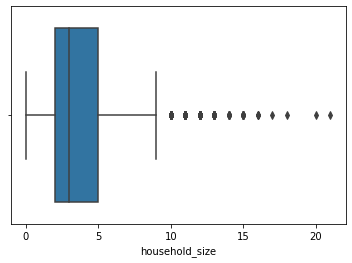

In [10]:
# Checking for Outliers
#we first visualize the outliers for the float and int variables.
print(sns.boxplot(x =df['household_size']))


household size has outliers.

AxesSubplot(0.125,0.125;0.775x0.755)


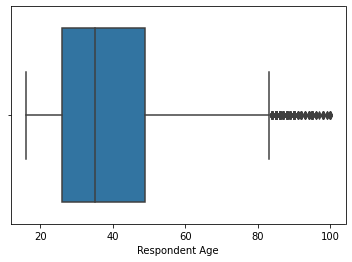

In [11]:
# Checking for Outliers in Respondent Age
#
print(sns.boxplot(x =df['Respondent Age']))


Respondents age has outliers

In [12]:
#removing the outlliers using IQR.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)
df['year'] = df['year'].astype('str')
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


household_size     3.0
Respondent Age    23.0
dtype: float64
       Cell Phone Access  Has a Bank account  ...  uniqueid   year
0                  False               False  ...     False  False
1                  False               False  ...     False  False
2                  False               False  ...     False  False
3                  False               False  ...     False  False
4                  False               False  ...     False  False
...                  ...                 ...  ...       ...    ...
23519              False               False  ...     False  False
23520              False               False  ...     False  False
23521              False               False  ...     False  False
23522              False               False  ...     False  False
23523              False               False  ...     False  False

[23524 rows x 13 columns]


In [13]:
# Checking for Anomalies
#

In [14]:
# Identifying the Missing Data
#
df1.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

In [15]:
# Dealing with the Missing Data
#
df2=df1.dropna()
df2.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

Rows with missing data have been dropped

In [16]:
#checking for duplicates.
df2.duplicated().sum()


0

data has no duplicates

## 6. Exploratory Analysis

# a) Univariate analysis

In [17]:
df2.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [18]:
## Creating our frequency table
# ---
df2.gender_of_respondent.value_counts()

Female    13398
Male       9330
Name: gender_of_respondent, dtype: int64

In [19]:
df2.country.value_counts()

Rwanda      8513
Tanzania    6424
Kenya       5870
Uganda      1921
Name: country, dtype: int64



### Measures of Central Tendency








In [20]:
#Measure of central tendency
#mean
df2["household_size"].mean()
#mean for household size

3.5799454417458643

In [21]:
#mean
df2["Respondent Age"].mean()


38.34644491376276



*   Mode




In [22]:
#household size
df2["household_size"].mode()

0    2.0
dtype: float64

In [23]:
#respondent age
df2["Respondent Age"].mode()

0    30.0
dtype: float64



*   Median





In [24]:
#respondent age
df2["Respondent Age"].median()

35.0

In [25]:
#household size
df2["household_size"].median()

3.0

In [26]:
df2.describe()

,household_size,Respondent Age
count,22728.000000,22728.000000
mean,3.579945,38.346445
std,2.080472,15.806083
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,48.000000
max,9.000000,83.000000


### Measures of Dispersion/Variability/Spread

In [27]:
#Standard deviation for household size
df2["household_size"].std()

2.080472172896514

In [28]:
#Standard deviation for respondent age
df2["Respondent Age"].std()

15.806083451261577

In [29]:
#2.Variance
# Finding the variance of the household size
df2["household_size"].var()

4.328364462196743

In [30]:
#Finding variance of the Respondent age
df2["Respondent Age"].var()

249.83227406824508

In [31]:
#3.RANGE
#Range for hosehold size
#Finding minimum and maximum values
df2_max = df2["household_size"].max()
df2_min = df2["household_size"].min()

# Calculating the range
df2_max - df2_min

9.0

In [32]:
#Range for Respondent Age
#Finding minimum and maximum values
df3_max = df2["Respondent Age"].max()
df4_min = df2["Respondent Age"].min()

# Calculating the range
df3_max - df4_min

67.0

In [33]:
# 4. Quantiles 
# Finding the quantiles of the hosehold size
df2["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [34]:
# Finding the quantiles of the Respondent Age
df2["Respondent Age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: Respondent Age, dtype: float64

In [35]:
#5. SKEWNESS
## Determining the skeweness for household size
df2["household_size"].skew()

0.6057809678526579

household size is positively skewed.


In [36]:
## Determining the skeweness for household size
df2["Respondent Age"].skew()

0.7402596648483929

Respondent age is positively skewed.


In [37]:
#6 KURTOSIS
# Determining the kurtosis for household size
df2["household_size"].kurt()

-0.5056067906817878

In [38]:
# Determining the kurtosis for respondent age
df2["Respondent Age"].kurt()

-0.23732359970558425

Both respondent age and household size have negative kurtosis since they lack oultliers and are therefore light tailed.

# visualizations

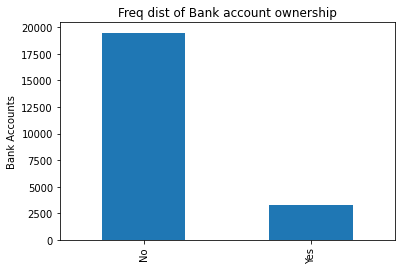

In [42]:
#visualisation of bank account ownership.
df2['Has a Bank account'].value_counts().plot.bar(title='Freq dist of Bank account ownership', )
plt.ylabel('Bank Accounts')
plt.show()
#From the numbers it is clear we are yet to achieve financial inclusion.

it shows that very few people have bank accounts.

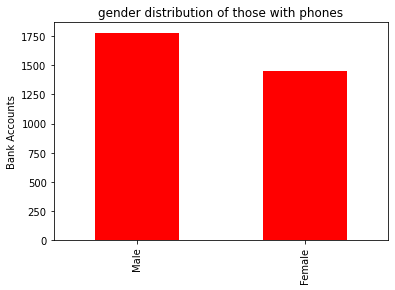

In [45]:
#gender distibution of those with phones.
#a new dataframe is created where df2['Has a Bank account'] == 'Yes'
a=df2[df2['Has a Bank account'] == 'Yes']
a['gender_of_respondent'].value_counts().plot.bar(title='gender distribution of those with phones', color='red')
plt.ylabel('Bank Accounts')
plt.show()


Males have more phones than the females.

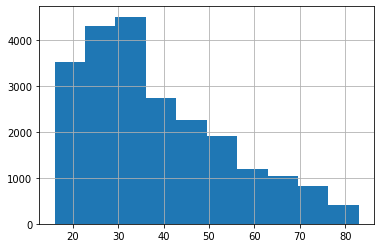

In [46]:
#Histogram of respondent age 
df2['Respondent Age'].hist()
plt.show()

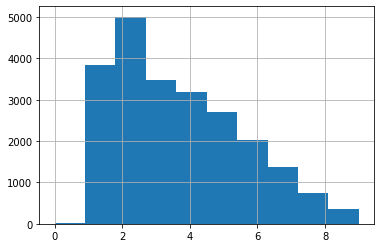

In [47]:
#Histogram of household 
df2['household_size'].hist()
plt.show()

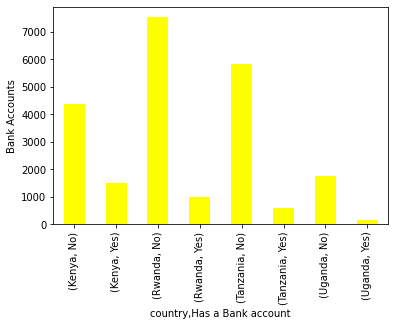

In [54]:
# Bank account ownership vs country.
r=df2.groupby (['country','Has a Bank account'])['Has a Bank account'].count()
r.plot(kind='bar', color='yellow')
plt.ylabel('Bank Accounts')
plt.show()

in all the three countries majority of the population lack bank accounts

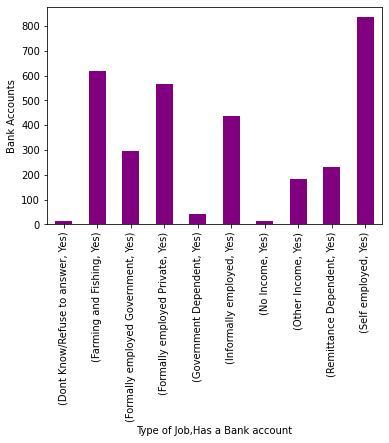

In [60]:
#type of job vs bank account ownership
q=a.groupby (['Type of Job','Has a Bank account'])['Has a Bank account'].count()
q.plot(kind='bar',  color='purple')
plt.ylabel('Bank Accounts')
plt.show()


the self employed have more bank accounts

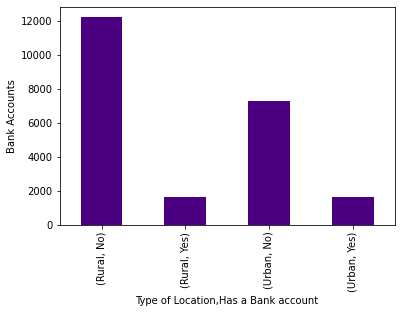

In [62]:
#rural/urban vs bank accounts.
g=df2.groupby (['Type of Location','Has a Bank account'])['Has a Bank account'].count()
g.plot(kind='bar',  color='indigo')
plt.ylabel('Bank Accounts')
plt.show()


The rural and urban population with bank accounts is almost similar.

Text(0, 0.5, 'Bank Accounts')

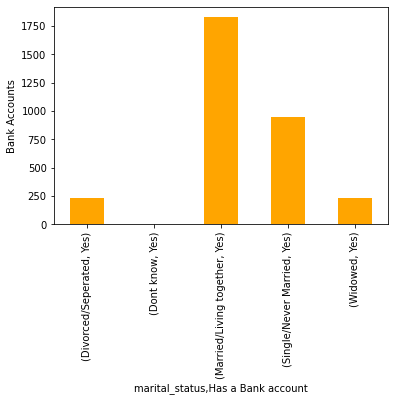

In [63]:
#marital status vs bank account ownership
d=a.groupby (['marital_status','Has a Bank account'])['Has a Bank account'].count()
d.plot(kind='bar',  color='orange')
plt.ylabel('Bank Accounts')


those married/living together have highest number of bank accounts

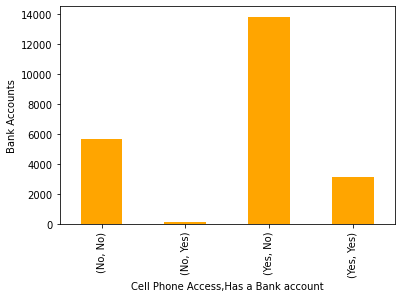

In [69]:
#visualisation on phone access and owning a bank account.
b=df2.groupby (['Cell Phone Access','Has a Bank account'])['Has a Bank account'].count()
b.plot(kind='bar', color='orange')
plt.ylabel('Bank Accounts')
plt.show()


for those with cell phone access, very many have no bank accounts.


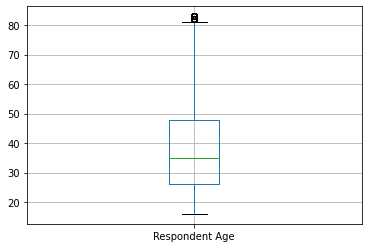

In [56]:
# Creating the boxplot
#
df2.boxplot(["Respondent Age"])
plt.show()

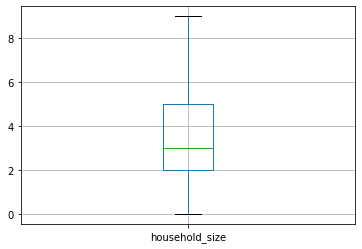

In [57]:
#boxplot for household size
df2.boxplot(["household_size"])
plt.show()

# b) Bivariate analysis.

In [70]:
df2.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018-01-01,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018-01-01,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018-01-01,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018-01-01,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018-01-01,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


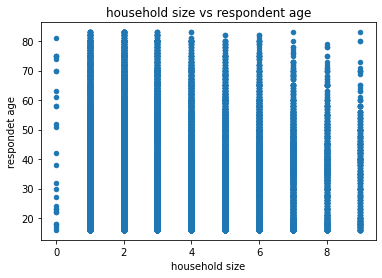

In [79]:
#Scatter plot
 #Using Pandas: Plotting our scatterplot to compare the variables
df2.plot(x = 'household_size', y = 'Respondent Age', kind='scatter')

# Giving our scatterplot a title
plt.title('household size vs respondent age')

# Labelling our x axis
plt.xlabel('household size')

# Labelling our y axis
plt.ylabel('respondet age')

# We then display our scatterplot as shown below
plt.show()



There is no relation because the points are scattered throughout the graph.

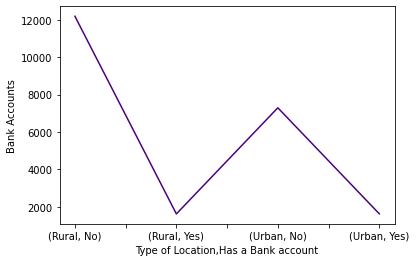

In [76]:
h=df2.groupby (['Type of Location','Has a Bank account'])['Has a Bank account'].count()
h.plot(kind='line',  color='indigo')
plt.ylabel('Bank Accounts')
plt.show()

In [83]:
# Calculating the pearson coefficient for people with bank accounts
y=df2[df2['Has a Bank account'] == 'Yes']
y["household_size"].corr(y["Respondent Age"]) 


0.025159069419076287

for population with bank account, household size ad respondent age has moderate correlation.

In [84]:
#general correlation
df2["household_size"].corr(df2["Respondent Age"])

-0.10625906518541647

for the dataset, household size and resident age have very weak negative correlation.

In [85]:
# Calculating the pearson coefficient for male gender
u=df2[df2['gender_of_respondent'] == 'Male']
u["household_size"].corr(y["Respondent Age"]) 


0.07976411063483198

for the male population resident age and household size has a very weak positive correlation.

In [86]:
# Calculating the pearson coefficient for female gender
u=df2[df2['gender_of_respondent'] == 'Female']
u["household_size"].corr(y["Respondent Age"]) 


-0.04278170383157936

for the male population resident age and household size has a very weak negative correlation.

In [88]:
# Calculating the pearson coefficient for rural population
t=df2[df2['Type of Location'] == 'Rural']
t["household_size"].corr(y["Respondent Age"]) 


-0.029956755204531425

for the rural population resident age and household size has a very weak negative correlation.

In [90]:
# Calculating the pearson coefficient for urban population
r=df2[df2['Type of Location'] == 'Urban']
r["household_size"].corr(y["Respondent Age"]) 

0.06770838689660362

for the urban population resident age and household size has a very weak positive correlation.

# c)Multivariate analysis

#### PCA

In [92]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
X = df2.iloc[:, 6:-5].values
y=df2['gender_of_respondent']

In [93]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(array([[ 3., 24.],
        [ 1., 72.],
        [ 3., 34.],
        ...,
        [ 2., 45.],
        [ 9., 42.],
        [ 6., 33.]]), array([[ 5., 23.],
        [ 6., 33.],
        [ 2., 35.],
        ...,
        [ 2., 53.],
        [ 3., 45.],
        [ 2., 24.]]), 20844    Female
 15749      Male
 12657    Female
 16059      Male
 20877    Female
           ...  
 13497    Female
 20229      Male
 10124      Male
 11094      Male
 2832       Male
 Name: gender_of_respondent, Length: 18182, dtype: object, 7805       Male
 10039    Female
 18863    Female
 22048    Female
 8443     Female
           ...  
 9569     Female
 12693      Male
 7287     Female
 5480     Female
 20264      Male
 Name: gender_of_respondent, Length: 4546, dtype: object)

In [94]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [96]:
#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.55190095, 0.44809905])

In [97]:
#Using 2 Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [98]:
#Training and Making Predictions
#we use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [99]:
#Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred))
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[2701   32]
 [1771   42]]
Accuracy0.6033875934887813


#### Discriminant analysis

In [100]:
#Preprocessing
#divide the dataset into a feature set and corresponding labels
A = df2.iloc[:, 6:-5].values
#b = df2[['country',	'year',	'uniqueid',	'Has a Bank account',	'Type of Location',	'Cell Phone Access','gender_of_respondent'	,'The relathip with head'	,'marital_status','Level of Educuation'	,'Type of Job']].values
b=df2['gender_of_respondent']


In [101]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=0)
A_train, A_test, b_train, b_test

(array([[ 3., 24.],
        [ 1., 72.],
        [ 3., 34.],
        ...,
        [ 2., 45.],
        [ 9., 42.],
        [ 6., 33.]]), array([[ 5., 23.],
        [ 6., 33.],
        [ 2., 35.],
        ...,
        [ 2., 53.],
        [ 3., 45.],
        [ 2., 24.]]), 20844    Female
 15749      Male
 12657    Female
 16059      Male
 20877    Female
           ...  
 13497    Female
 20229      Male
 10124      Male
 11094      Male
 2832       Male
 Name: gender_of_respondent, Length: 18182, dtype: object, 7805       Male
 10039    Female
 18863    Female
 22048    Female
 8443     Female
           ...  
 9569     Female
 12693      Male
 7287     Female
 5480     Female
 20264      Male
 Name: gender_of_respondent, Length: 4546, dtype: object)

In [102]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [103]:
#performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
A_train = lda.fit_transform(A_train, b_train)
A_test = lda.transform(A_test)

In [104]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(A_train, b_train)
b_pred = classifier.predict(A_test)

In [105]:
#Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(b_test, b_pred))
print('Accuracy' + str(accuracy_score(b_test, b_pred)))

[[2715   18]
 [1804    9]]
Accuracy0.5992080950285966


## 7. Implementing the Solution

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?

# Recommendations

1. Creating awareness amongst women on the use of bank services.
2. Educating the rural population on the use of financial services.
3. Uganda should colaborate with Kenya in order to improve its finacial services usage. 